Hedefimiz YKS-2019 sonuçları bölümlere yerleştirme puanları tablosunu incelemek. 

Bunu iki kısımda yapacağız. Önce veriyi tanımayan durumda iken veriye dair bilgiler toparlayacağız. Ardından yapmak istediklerimizi (herhangi bir bölümün Türkiye genelinde puan sıralaması) jenerik bir fonksiyonda tanımlayıp gerçekleştireceğiz

# 1) Veriyi tanıma için adım adım inceleme

In [2]:
import pandas as pd
url = 'https://raw.githubusercontent.com/barisbozkurt/dataDumpForCourses/master/YKS_YerlestirmePuanlari_2019.xlsx'
#url = '../veri/YKS_YerlestirmePuanlari_2019.xlsx'
yks_data = pd.read_excel(url)
yks_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11402 entries, 0 to 11401
Data columns (total 6 columns):
Program Adı      11402 non-null object
Puan Türü        11402 non-null object
Genel Kont.      11402 non-null int64
Yerleşen         11402 non-null int64
En Küçük Puan    11402 non-null object
En Büyük Puan    11402 non-null object
dtypes: int64(2), object(4)
memory usage: 534.6+ KB


In [3]:
#Verinin ilk ve son 3 satırını görelim
print(yks_data.head(3))
print(yks_data.tail(3))

                                         Program Adı  ... En Büyük Puan
0  ABDULLAH GÜL ÜNİVERSİTESİ (KAYSERİ)/İnsan ve T...  ...       394.246
1  ABDULLAH GÜL ÜNİVERSİTESİ (KAYSERİ)/Mimarlık F...  ...        447.87
2  ABDULLAH GÜL ÜNİVERSİTESİ (KAYSERİ)/Mühendisli...  ...       474.451

[3 rows x 6 columns]
                                             Program Adı  ... En Büyük Puan
11399  ULUSLARARASI BALKAN ÜNİVERSİTESİ (ÜSKÜP-MAKEDO...  ...           ---
11400  ULUSLARARASI BALKAN ÜNİVERSİTESİ (ÜSKÜP-MAKEDO...  ...           ---
11401  ULUSLARARASI BALKAN ÜNİVERSİTESİ (ÜSKÜP-MAKEDO...  ...           ---

[3 rows x 6 columns]


Program adında hem üniversite, hem fakülte, hem de bölüm ismi var, üç kolona bölerek daha rahat inceleriz

In [0]:
#Program adı kolonundaki içeriği /'ten üç parçaya bölelim
parcalar = yks_data['Program Adı'].str.split("/", n = 2, expand = True) # iki kere /'dan bölüyoruz
yks_data['Üniversite'] = parcalar[0]
yks_data['Fakülte'] = parcalar[1]
yks_data['Bölüm'] = parcalar[2]
yks_data = yks_data.drop(columns='Program Adı')#bölüp diğer kolonlara aktardığımız için bu kolonu silebiliriz

Sadece sayısal puanıyla öğrenci alan bölümleri ele alalım

In [0]:
yks_data = yks_data[yks_data['Puan Türü'] == 'SAY']

Her bölümden kaçar adet olduğuna bakalım

In [7]:
yks_data['Bölüm'].value_counts()

Hemşirelik                                                                            97
Makine Mühendisliği                                                                   84
İnşaat Mühendisliği                                                                   81
Matematik                                                                             79
Elektrik-Elektronik Mühendisliği                                                      78
                                                                                      ..
Genetik ve Yaşam Bilimleri Programları (İngilizce) (%50 İndirimli)                     1
Hidrojeoloji Mühendisliği                                                              1
Tıp Fakültesi (İngilizce) (UOLP-Marmara Üniversitesi) (T.C. Vatandaşları) (Burslu)     1
Bilişim Sistemleri ve Teknolojileri (İngilizce) (Burslu)                               1
Hamidiye Uluslararası Tıp Fakültesi                                                    1
Name: Bölüm, Length: 

Sadece içerisinde 'Elektronik' geçen bölümleri içerecek şekilde veriyi küçültelim

In [0]:
yks_data = yks_data[yks_data['Bölüm'].str.contains('Elektronik')]

Puanları belli olmayan bölümler var, bunları listeden çıkartalım

In [9]:
#Örnek
yks_data.loc[10005]

Puan Türü                                                      SAY
Genel Kont.                                                      6
Yerleşen                                                         0
En Küçük Puan                                                  ---
En Büyük Puan                                                  ---
Üniversite                              YAŞAR ÜNİVERSİTESİ (İZMİR)
Fakülte                                      Mühendislik Fakültesi
Bölüm            Elektrik-Elektronik Mühendisliği (İngilizce-Fr...
Name: 10005, dtype: object

In [0]:
yks_data = yks_data[yks_data['En Küçük Puan'] != '---']

Kontenjanlarının yarısını dolduramayan Elektronik bölümleri:

In [11]:
yks_data[yks_data['Yerleşen'] < yks_data['Genel Kont.']/2]

,Puan Türü,Genel Kont.,Yerleşen,En Küçük Puan,En Büyük Puan,Üniversite,Fakülte,Bölüm
80,SAY,40,11,260.777,329.775,ADIYAMAN ÜNİVERSİTESİ,Mühendislik Fakültesi,Elektrik-Elektronik Mühendisliği
147,SAY,14,5,261.014,278.762,AFYON KOCATEPE ÜNİVERSİTESİ (AFYONKARAHİSAR),Teknoloji Fakültesi,Elektrik-Elektronik Mühendisliği (M.T.O.K.)
332,SAY,30,7,260.634,332.688,AKSARAY ÜNİVERSİTESİ,Mühendislik Fakültesi,Elektrik-Elektronik Mühendisliği (İÖ)
828,SAY,28,9,264.219,292.056,ANTALYA BİLİM ÜNİVERSİTESİ,Mühendislik Fakültesi,Elektrik-Elektronik Mühendisliği (İngilizce) (...
1133,SAY,18,2,261.99,264.11,AVRASYA ÜNİVERSİTESİ (TRABZON),Mühendislik ve Mimarlık Fakültesi,Elektrik-Elektronik Mühendisliği (%75 İndirimli)
1508,SAY,70,20,261.937,314.721,BARTIN ÜNİVERSİTESİ,"Mühendislik, Mimarlık ve Tasarım Fakültesi",Elektrik-Elektronik Mühendisliği
1657,SAY,10,3,262.751,279.39,BAŞKENT ÜNİVERSİTESİ (ANKARA),Mühendislik Fakültesi,Elektrik-Elektronik Mühendisliği (Ücretli)
1737,SAY,30,6,265.148,328.466,BATMAN ÜNİVERSİTESİ,Mühendislik-Mimarlık Fakültesi,Elektrik-Elektronik Mühendisliği
1761,SAY,40,1,296.008,296.008,BAYBURT ÜNİVERSİTESİ,Mühendislik Fakültesi,Elektrik-Elektronik Mühendisliği
2052,SAY,25,2,261.723,265.887,BİNGÖL ÜNİVERSİTESİ,Mühendislik-Mimarlık Fakültesi,Elektrik-Elektronik Mühendisliği


Sadece İzmir'deki kontenjanı 20 üzerindeki (çünkü düşük olanlar temelde az sayıda burslu içeriyor) Elektronik Bölümlerini ele alalım

In [12]:
izmir_elektronik = yks_data[yks_data['Üniversite'].str.contains("İZMİR")]
print("İzmir'deki Elektronik bölümlerine yerlesen öğrenci sayısı: ", izmir_elektronik['Yerleşen'].sum(),'\n')
izmir_elektronik = izmir_elektronik[yks_data['Genel Kont.'] > 20]

İzmir'deki Elektronik bölümlerine yerlesen öğrenci sayısı:  517 



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


En küçük puana göre sıralama

In [14]:
izmir_elektronik.sort_values(by=['En Küçük Puan'])

,Puan Türü,Genel Kont.,Yerleşen,En Küçük Puan,En Büyük Puan,Üniversite,Fakülte,Bölüm
10009,SAY,30,22,261.492,310.928,YAŞAR ÜNİVERSİTESİ (İZMİR),Mühendislik Fakültesi,Elektrik-Elektronik Mühendisliği (İngilizce) (...
6219,SAY,70,71,325.638,372.746,İZMİR BAKIRÇAY ÜNİVERSİTESİ,Mühendislik ve Mimarlık Fakültesi,Elektrik-Elektronik Mühendisliği
6248,SAY,60,60,333.365,417.538,İZMİR DEMOKRASİ ÜNİVERSİTESİ,Mühendislik Fakültesi,Elektrik-Elektronik Mühendisliği (İngilizce)
6318,SAY,32,32,349.435,428,İZMİR EKONOMİ ÜNİVERSİTESİ,Mühendislik Fakültesi,Elektrik-Elektronik Mühendisliği (İngilizce) (...
6362,SAY,70,70,407.536,430.866,İZMİR KATİP ÇELEBİ ÜNİVERSİTESİ,Mühendislik ve Mimarlık Fakültesi,Elektrik-Elektronik Mühendisliği (İngilizce)
3046,SAY,80,80,427.206,452.348,EGE ÜNİVERSİTESİ (İZMİR),Mühendislik Fakültesi,Elektrik-Elektronik Mühendisliği
2906,SAY,90,90,430.992,465.493,DOKUZ EYLÜL ÜNİVERSİTESİ (İZMİR),Mühendislik Fakültesi,Elektrik-Elektronik Mühendisliği (İngilizce)
6401,SAY,60,60,436.249,470.873,İZMİR YÜKSEK TEKNOLOJİ ENSTİTÜSÜ,Mühendislik Fakültesi,Elektronik ve Haberleşme Mühendisliği (İngilizce)


En büyük puana göre sıralama

In [15]:
izmir_elektronik.sort_values(by=['En Büyük Puan'])

,Puan Türü,Genel Kont.,Yerleşen,En Küçük Puan,En Büyük Puan,Üniversite,Fakülte,Bölüm
10009,SAY,30,22,261.492,310.928,YAŞAR ÜNİVERSİTESİ (İZMİR),Mühendislik Fakültesi,Elektrik-Elektronik Mühendisliği (İngilizce) (...
6219,SAY,70,71,325.638,372.746,İZMİR BAKIRÇAY ÜNİVERSİTESİ,Mühendislik ve Mimarlık Fakültesi,Elektrik-Elektronik Mühendisliği
6248,SAY,60,60,333.365,417.538,İZMİR DEMOKRASİ ÜNİVERSİTESİ,Mühendislik Fakültesi,Elektrik-Elektronik Mühendisliği (İngilizce)
6318,SAY,32,32,349.435,428,İZMİR EKONOMİ ÜNİVERSİTESİ,Mühendislik Fakültesi,Elektrik-Elektronik Mühendisliği (İngilizce) (...
6362,SAY,70,70,407.536,430.866,İZMİR KATİP ÇELEBİ ÜNİVERSİTESİ,Mühendislik ve Mimarlık Fakültesi,Elektrik-Elektronik Mühendisliği (İngilizce)
3046,SAY,80,80,427.206,452.348,EGE ÜNİVERSİTESİ (İZMİR),Mühendislik Fakültesi,Elektrik-Elektronik Mühendisliği
2906,SAY,90,90,430.992,465.493,DOKUZ EYLÜL ÜNİVERSİTESİ (İZMİR),Mühendislik Fakültesi,Elektrik-Elektronik Mühendisliği (İngilizce)
6401,SAY,60,60,436.249,470.873,İZMİR YÜKSEK TEKNOLOJİ ENSTİTÜSÜ,Mühendislik Fakültesi,Elektronik ve Haberleşme Mühendisliği (İngilizce)


Grafiğe yansıtalım

In [0]:
#Çizim kütüphanelerinin yüklenmesi
import matplotlib.pyplot as plt
import seaborn as sns

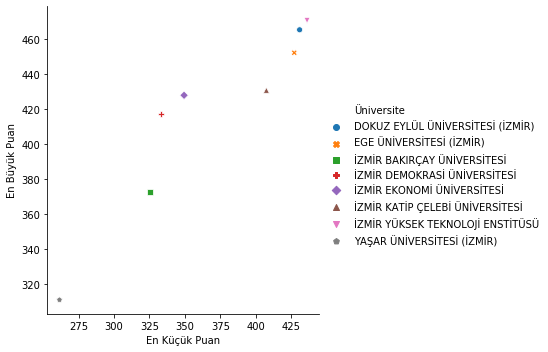

In [22]:
sns.relplot(x = "En Küçük Puan", y = "En Büyük Puan", hue = "Üniversite", style = "Üniversite", data = izmir_elektronik);

# 2) Yaptığımız deneylerden yola çıkarak ihtiyacımızı karşılayacak bir fonksiyon yazalım

In [0]:
#Tüm değişkenleri silelim ve veriyi baştan yükleyelim
%reset -f 

import pandas as pd

url = 'https://raw.githubusercontent.com/barisbozkurt/dataDumpForCourses/master/YKS_YerlestirmePuanlari_2019.xlsx'
#url = '../veri/YKS_YerlestirmePuanlari_2019.xlsx'
yks_data = pd.read_excel(url)

#Program adı kolonundaki içeriği /'ten üç parçaya bölelim
parcalar = yks_data['Program Adı'].str.split("/", n = 2, expand = True) # iki kere /'dan bölüyoruz
yks_data['Üniversite'] = parcalar[0]
yks_data['Fakülte'] = parcalar[1]
yks_data['Bölüm'] = parcalar[2]
yks_data = yks_data.drop(columns='Program Adı')#bölüp diğer kolonlara aktardığımız için bu kolonu silebiliriz

#Kontenjanı 30 altındakileri dışarıda bırakalım
yks_data = yks_data[yks_data['Genel Kont.'] >= 30]

Hedefimiz bölümleri puanları açısından karşılaştırabilmek, bunun için jenerik bir fonksiyon tanımlayıp kullanalım

In [0]:
# Filtreleme ve sıraya dizme fonksiyonu
def bolum_karsilastir(data_frame, filtreler, siralama_kolonu):
  """Verilen data-frame'i filtreler parametresindeki içeriğe göre filtreleyip 
  belirli bir kolondaki değere göre sıralar ve elde ettiği data-fram'i döndürür. 
  
  Örnek kullanım:
  
  >>filtreler =	[
    ("Bölüm", "Elektronik", "iceriyorsa", "dahil et"),
    ("Bölüm", "Mühendisliği", "iceriyorsa", "dahil et"),
    ("Bölüm", "İndirimli", "iceriyorsa", "çıkart"),
    ("Bölüm", "Burslu", "iceriyorsa", "çıkart"),
    ("En Küçük Puan", "---", "eşitse", "çıkart")
    ]
  >>f_df = bolumKarsilastir(data_frame, filtreler, 'En Küçük Puan')
  
  Filtre formatı: 
    Kolonların belirli bir altmetni içermesi/içermemesine veya eşit 
    olması/olmamasına göre filtreleme yapar. içerme durumu "dahil et" veya 
    "çıkart" ifadeleriyle kontrol edilir
  
  Parametreler:
    data_frame (pandas data_frame)
    filtreler (list): filtrelenecek kolon ve o kolonda hangi altmetnin aranacağını
        içeren liste. Örnek: [("Bölüm", "Burslu", "iceriyorsa", "dahil et")
                              ,("En Küçük Puan", "---", "eşitse", "çıkart")]
    siralama_kolonu (str): verinin sıralacağını kolon ismi 
    
  Çıktılar:
    filt_data_frame (pandas data_frame)
  
  """
  #Girdinin kendisini bozmamak için kopyalayalım
  filt_data_frame = data_frame.copy()
  #Filtreleme
  for kolon, metin, durum, islem in filtreler:
    if islem == 'dahil et':
      print(kolon, 'kolonunda ',metin, 'içeren veriler alındı')
      if durum == "iceriyorsa":
        filt_data_frame = filt_data_frame[filt_data_frame[kolon].str.contains(metin)]
      elif durum == "eşitse":
        filt_data_frame = filt_data_frame[filt_data_frame[kolon] == metin]
      else:
        print(durum,'anlaşılamadı')
    elif islem == 'çıkart':
      print(kolon, 'kolonunda ',metin, 'içeren veriler dışarıda bırakıldı')
      if durum == "iceriyorsa":
        filt_data_frame = filt_data_frame[~filt_data_frame[kolon].str.contains(metin)]
      elif durum == "eşitse":
        filt_data_frame = filt_data_frame[filt_data_frame[kolon] != metin]
      else:
        print(durum,'anlaşılamadı')
    else:
      print('Filtre içeriği anlaşılamadı ve uygulanmadı: ',kolon,metin, durum, islem)
  print(siralama_kolonu, 'na göre sıraya dizildi')
  return filt_data_frame.sort_values(by=[siralama_kolonu], ascending = False)
#----------------------------------------------------------------

In [31]:
#Fonksiyonun veri üzerinde işletilmesi
filtreler =	[
    ("Bölüm", "Elektronik", "iceriyorsa", "dahil et"),
    ("Bölüm", "Mühendisliği", "iceriyorsa", "dahil et"),
    ("Bölüm", "İndirimli", "iceriyorsa", "çıkart"),
    ("Bölüm", "Burslu", "iceriyorsa", "çıkart"),
    ("En Küçük Puan", "---", "eşitse", "çıkart")
]

f_df = bolum_karsilastir(yks_data, filtreler, siralama_kolonu = "En Küçük Puan")
f_df = f_df.reset_index()#sıralanmış haline endeks ekle

Bölüm kolonunda  Elektronik içeren veriler alındı
Bölüm kolonunda  Mühendisliği içeren veriler alındı
Bölüm kolonunda  İndirimli içeren veriler dışarıda bırakıldı
Bölüm kolonunda  Burslu içeren veriler dışarıda bırakıldı
En Küçük Puan kolonunda  --- içeren veriler dışarıda bırakıldı
En Küçük Puan na göre sıraya dizildi


In [32]:
# Veriyi bütün içeriğiyle gösterme
from IPython.core.display import HTML
display(HTML(f_df.to_html()))

,index,Puan Türü,Genel Kont.,Yerleşen,En Küçük Puan,En Büyük Puan,Üniversite,Fakülte,Bölüm
0,2179,SAY,80,80,537.257,563.781,BOĞAZİÇİ ÜNİVERSİTESİ (İSTANBUL),Mühendislik Fakültesi,Elektrik-Elektronik Mühendisliği (İngilizce)
1,8378,SAY,195,195,521.446,551.462,ORTA DOĞU TEKNİK ÜNİVERSİTESİ (ANKARA),Mühendislik Fakültesi,Elektrik-Elektronik Mühendisliği (İngilizce)
2,5788,SAY,60,60,514.356,527.159,İSTANBUL TEKNİK ÜNİVERSİTESİ,Elektrik-Elektronik Fakültesi,Elektronik ve Haberleşme Mühendisliği (İngilizce)
3,5787,SAY,110,110,501.778,515.212,İSTANBUL TEKNİK ÜNİVERSİTESİ,Elektrik-Elektronik Fakültesi,Elektronik ve Haberleşme Mühendisliği
4,3743,SAY,100,100,476.163,505.729,HACETTEPE ÜNİVERSİTESİ (ANKARA),Mühendislik Fakültesi,Elektrik-Elektronik Mühendisliği (İngilizce)
5,10229,SAY,110,110,458.061,490.911,YILDIZ TEKNİK ÜNİVERSİTESİ (İSTANBUL),Elektrik-Elektronik Fakültesi,Elektronik ve Haberleşme Mühendisliği
6,4216,SAY,80,80,457.639,508.388,İHSAN DOĞRAMACI BİLKENT ÜNİVERSİTESİ (ANKARA),Mühendislik Fakültesi,Elektrik-Elektronik Mühendisliği (İngilizce) (Ücretli)
7,3498,SAY,40,40,456.59,475.318,GAZİ ÜNİVERSİTESİ (ANKARA),Mühendislik Fakültesi,Elektrik-Elektronik Mühendisliği (İngilizce)
8,9636,SAY,45,45,449.805,477.166,TÜRK-ALMAN ÜNİVERSİTESİ (İSTANBUL),Mühendislik Fakültesi,Elektrik-Elektronik Mühendisliği (Almanca)
9,7667,SAY,70,70,449.362,470.443,MARMARA ÜNİVERSİTESİ (İSTANBUL),Mühendislik Fakültesi,Elektrik-Elektronik Mühendisliği (İngilizce)


In [0]:
#Dosyaya kaydetme
f_df.to_html('EE.html')
#from google.colab import files
#files.download('EE.html')#firefox'ta çalışmıyor, firefox kullanıyorsanız sol üst köşedeki >'u kullanıp files'dan indirin